# RAMP Challenge on Selectivity classification of higher education programs in France



# RAMP: Selectivity classification Challenge
*Hela Mhiri, Haythem Borchani , Mahdi Attia, Sami ElMokh from IPP/M2DS*

<div>
<table style="width:100%; background-color:white;">
  <tr style="background-color:white;">
    <td align="left"; style="background-color:white; width: 100%;">
        <a href="https://www.ip-paris.fr/">
            <img src="https://www.ip-paris.fr/voeux2022-telecomparis/images/logos_ecoles.png" width="1000px"/>
        </a>
    </td>
  </tr>
 </table>
</div>


## Table of Contents
* [Introduction](#introduction)
  * [Context](#context)
  * [Challenge Objective](#challenge-objective)
  * [Evaluation Criteria](#evaluation-criteria)
* [The dataset](#dataset)
* [Setup](#setup)
  * [Prerequisites](#prerequisites)
* [Data exploration](#exploration)
  * [Data download](#download)
  * [Visualize data](#visualize)
* [Solutions](#solutions)
  * [A dummy solution](#dummy)
  * [A simple solution](#simple)
* [Scoring](#scoring)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>

In today's rapidly evolving educational landscape, the competitiveness of educational programs plays a crucial role in shaping the academic and professional trajectories of students. Institutions offering programs ranging from undergraduate degrees to specialized courses often face the challenge of selecting candidates from a pool of applicants. Understanding the selectivity of these programs can provide valuable insights into their admission processes and overall reputation.

In this challenge, we aim to develop a machine learning model capable of predicting the selectivity of educational programs based on various factors . By leveraging historical data and advanced predictive modeling techniques, we seek to empower educational stakeholders with a tool that can aid in decision-making processes related to admissions and program management.
### Context <a class="anchor" id="context"></a>

In the quest for higher education, students often find themselves confronted with a myriad of options, each offering unique opportunities and pathways towards their academic and career aspirations. However, navigating through this plethora of choices can be daunting, particularly when it comes to assessing the selectivity and competitiveness of various educational programs.
To aid students like in making well-informed decisions, educational institutions and policymakers have recognized the importance of providing transparent and comparative information about program selectivity. By leveraging predictive models developed through machine learning and data analysis, institutions can conduct comparative analyses of different programs to determine their relative levels of selectivity.

### Challenge Objective <a class="anchor" id="challenge-objective"></a>

The primary objective of this challenge is to develop an image super-resolution model capable of upscaling a 64x64 grayscale image to a more refined 128x128 resolution. Participants are encouraged to leverage state-of-the-art techniques, including deep learning architectures, to achieve superior results.

### Evaluation Criteria <a class="anchor" id="evaluation-criteria"></a>

Participants will be assessed based on the fidelity of their super-resolved images compared to ground truth high-resolution images. Quantitative metrics such as Root Mean Squared Error ([RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html)) and Structural Similarity Index ([SSI](https://scikit-image.org/docs/stable/auto_examples/transform/plot_ssim.html)) will be used to evaluate the performance of the submissions. More details in the [Scoring](#scoring) section.

In [1]:
import pandas as pd
import numpy as np

/Users/mahdi/anaconda3/envs/ml-environment/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [36]:
df = pd.read_csv('data/train.csv', sep=',')

In [37]:
df.head()

,session,contrat_etab,cod_uai,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,ville_etab,lib_for_voe_ins,...,tri,cod_aff_form,detail_forma2,lien_form_psup,taux_acces_ens,part_acces_gen,part_acces_tec,part_acces_pro,etablissement_id_paysage,composante_id_paysage
0,2023,Public,0910620E,Lycée Robert Doisneau,91,Essonne,Ile-de-France,Versailles,Corbeil-Essonnes,BTS - Production - Electrotechnique,...,2_Lycées,10843,NaN,https://dossier.parcoursup.fr/Candidats/public...,43.0,6.0,33.0,61.0,NaN,NaN
1,2023,Public,0134015U,Aix-Marseille Université - Site de Marseille S...,13,Bouches-du-Rhône,Provence Alpes Côte d'Azur,Aix-Marseille,Marseille,Licence - Chimie - Portail Louis Pasteur,...,1_universités,39168,NaN,https://dossier.parcoursup.fr/Candidats/public...,77.0,99.0,1.0,0.0,xJdyB,NaN
2,2023,Public,0782104N,ISTY Mantes-Vélizy,78,Yvelines,Ile-de-France,Versailles,Mantes-la-Ville,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,34,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,73.0,100.0,0.0,0.0,NaN,NaN
3,2023,Public,0333298F,Université de Bordeaux - Bordeaux Métropole,33,Gironde,Nouvelle-Aquitaine,Bordeaux,Bordeaux,Licence - Parcours d'Accès Spécifique Santé (P...,...,1_universités,26838,NaN,https://dossier.parcoursup.fr/Candidats/public...,38.0,98.0,1.0,1.0,90I54,NaN
4,2023,Public,0561992L,Université de Rennes 1 - Antenne de Vannes,56,Morbihan,Bretagne,Rennes,Vannes,Licence - Parcours d'Accès Spécifique Santé (P...,...,1_universités,35846,NaN,https://dossier.parcoursup.fr/Candidats/public...,63.0,89.0,6.0,4.0,91D9w,NaN


In [38]:
df["select_form"].value_counts(normalize=True)

select_form
formation sélective        0.776233
formation non sélective    0.223767
Name: proportion, dtype: float64

<Axes: >

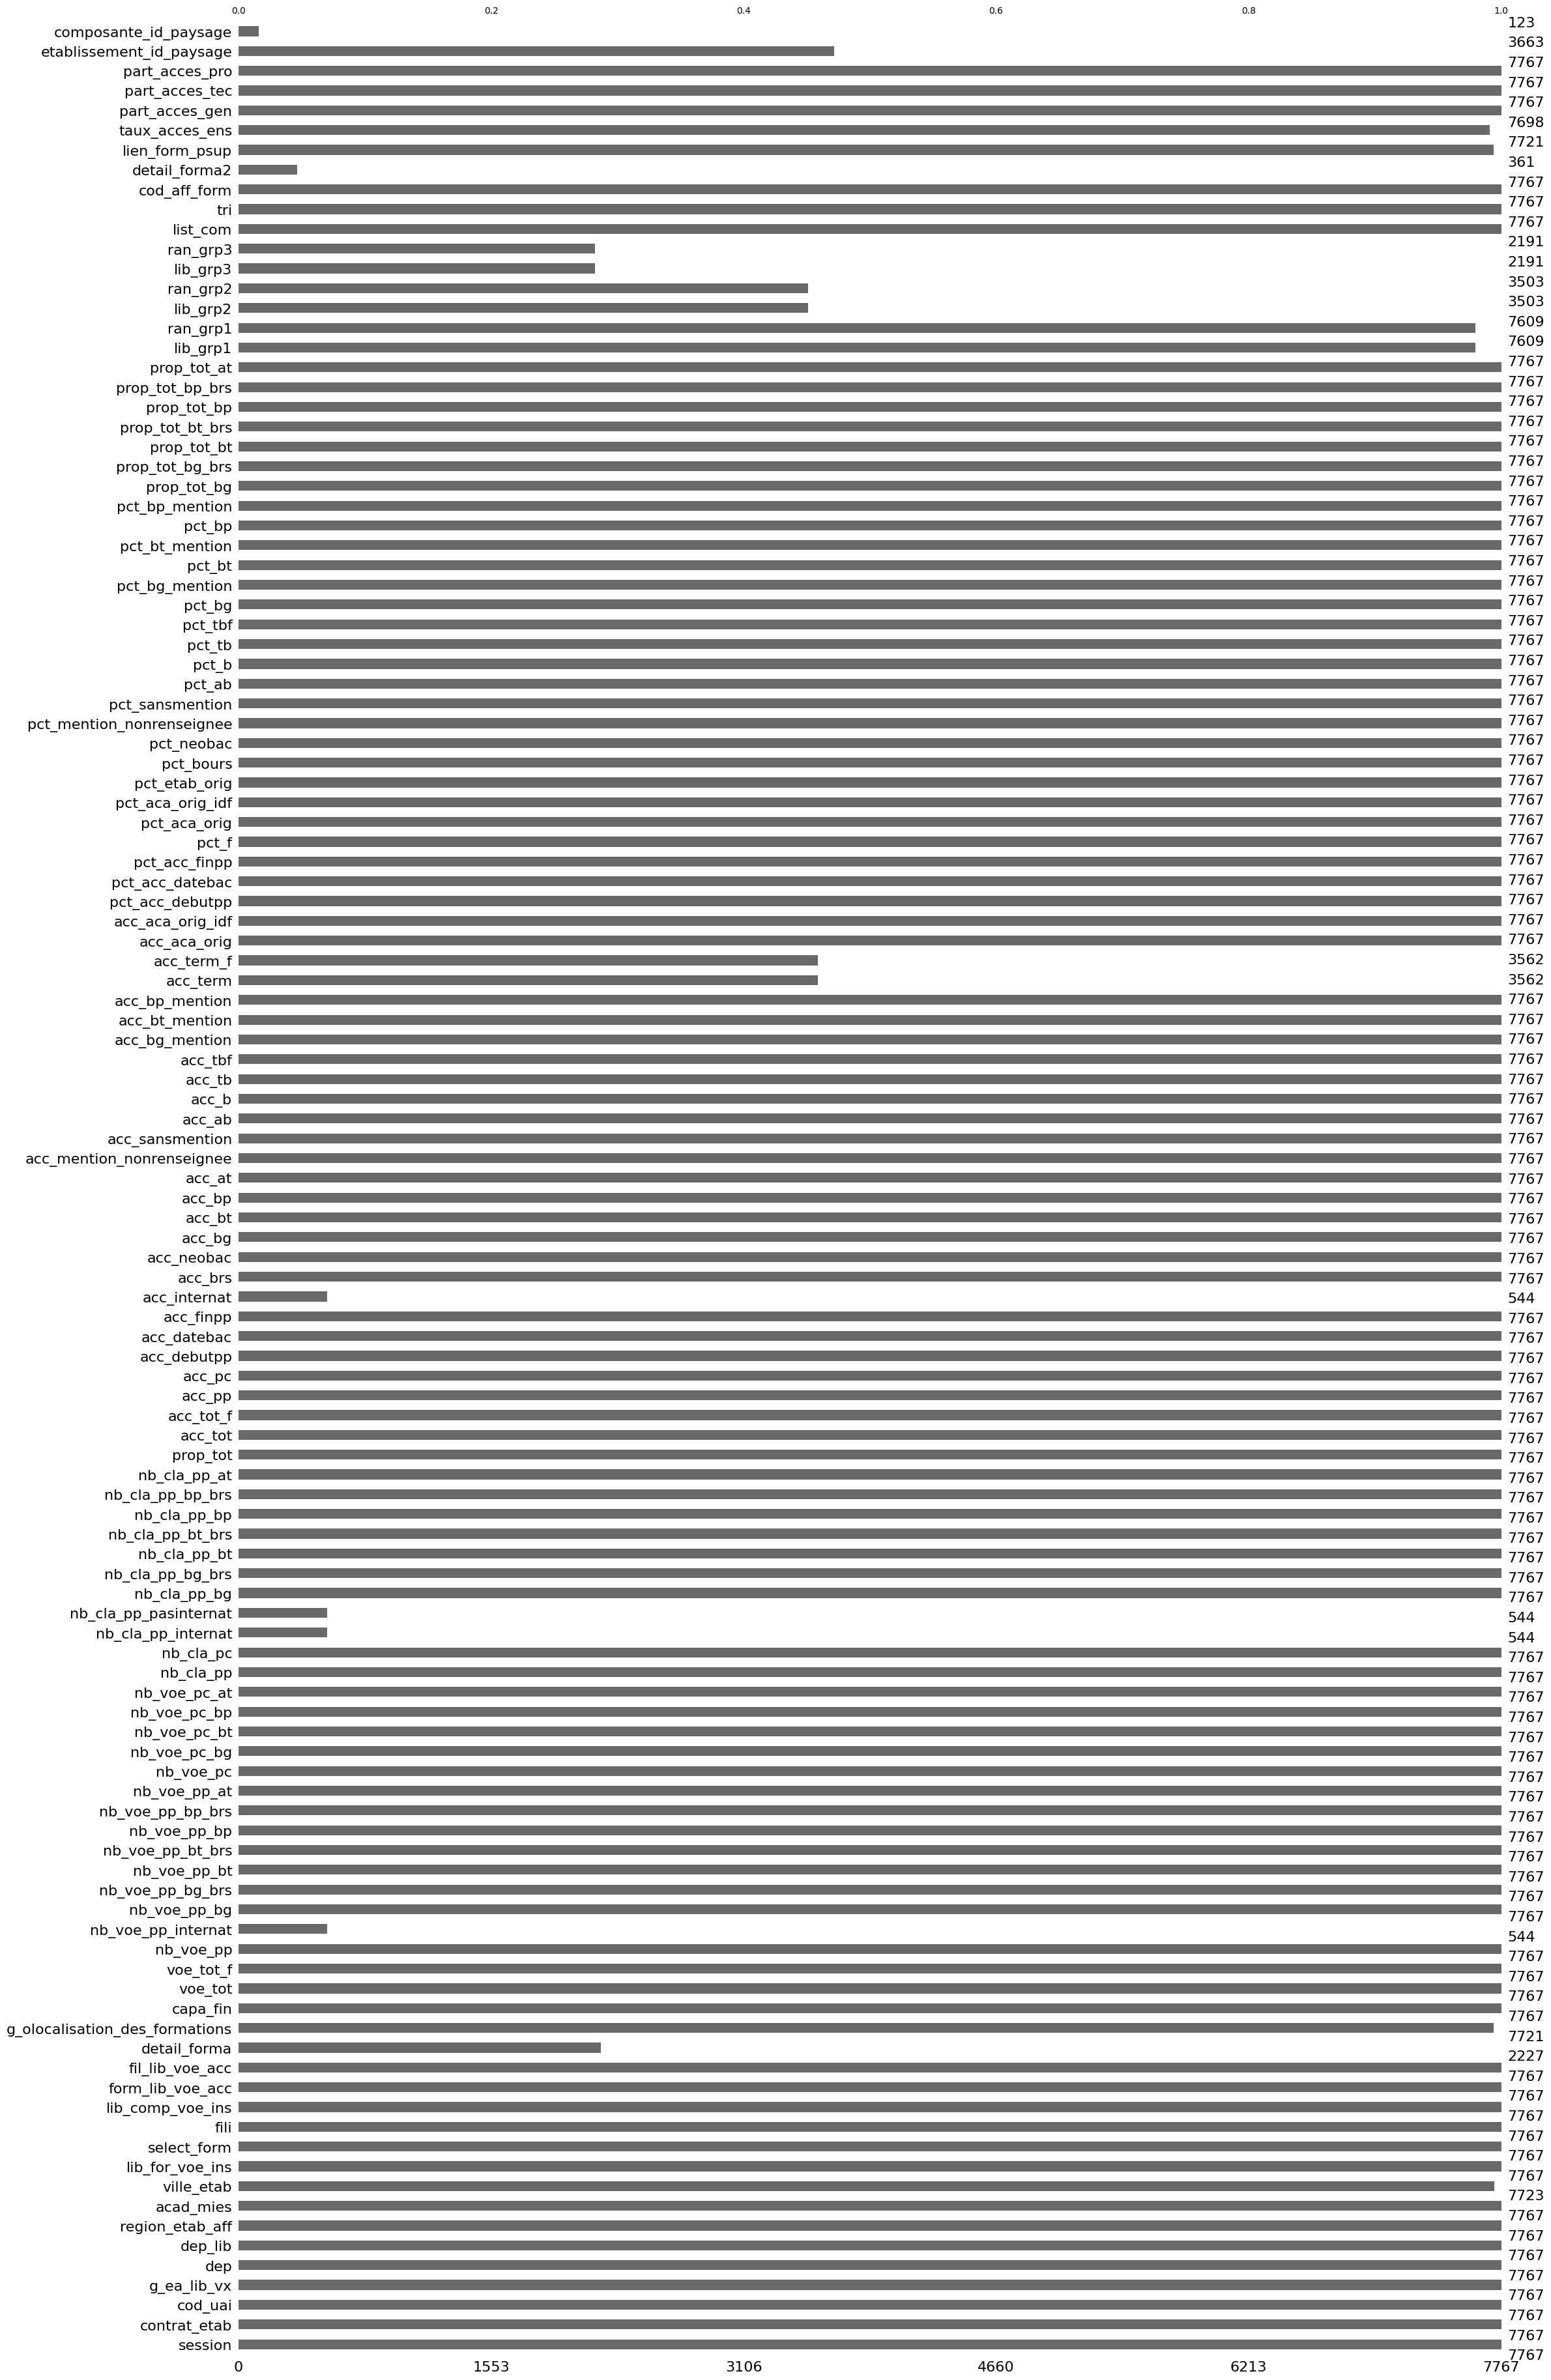

In [39]:
import missingno as msno
msno.bar(df)

In [40]:
nan_columns = df.columns[df.isna().any()]
print(nan_columns)

Index(['ville_etab', 'detail_forma', 'g_olocalisation_des_formations',
       'nb_voe_pp_internat', 'nb_cla_pp_internat', 'nb_cla_pp_pasinternat',
       'acc_internat', 'acc_term', 'acc_term_f', 'lib_grp1', 'ran_grp1',
       'lib_grp2', 'ran_grp2', 'lib_grp3', 'ran_grp3', 'detail_forma2',
       'lien_form_psup', 'taux_acces_ens', 'etablissement_id_paysage',
       'composante_id_paysage'],
      dtype='object')


In [59]:
df["taux_acces_ens"].isna().sum()/df.shape[0]

0.008883738895326381

In [18]:
df.head()

,session,contrat_etab,cod_uai,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,ville_etab,lib_for_voe_ins,...,tri,cod_aff_form,detail_forma2,lien_form_psup,taux_acces_ens,part_acces_gen,part_acces_tec,part_acces_pro,etablissement_id_paysage,composante_id_paysage
0,2023,Public,0212198A,L'institut Agro Dijon,21,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,Dijon,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,11,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,71.0,100.0,0.0,0.0,MihlE,upGa1
1,2023,Public,0542259M,EEIGM Nancy - Groupe INP,54,Meurthe-et-Moselle,Grand Est,Nancy-Metz,Nancy,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,21,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,75.0,100.0,0.0,0.0,t6Cq5,9pRyR
2,2023,Public,0580766T,ISAT Nevers,58,Nièvre,Bourgogne-Franche-Comté,Dijon,Nevers,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,23,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,40.0,100.0,0.0,0.0,NaN,NaN
3,2023,Public,0595868H,IMT Nord Europe,59,Nord,Hauts-de-France,Lille,Villeneuve-d'Ascq,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,24,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,25.0,100.0,0.0,0.0,NaN,NaN
4,2023,Public,0596610P,Polytech Lille,59,Nord,Hauts-de-France,Lille,Villeneuve-d'Ascq,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,26,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,46.0,100.0,0.0,0.0,NaN,NaN


In [43]:
df['select_form'].value_counts()

select_form
formation sélective        6029
formation non sélective    1738
Name: count, dtype: int64

In [48]:
df['select_form'] = df['select_form'].map({'formation sélective': 1, 'formation non sélective': 0})

In [49]:
#number of numerical columns
num_cols = df._get_numeric_data().columns

In [50]:
X_df = df[num_cols].fillna(0)

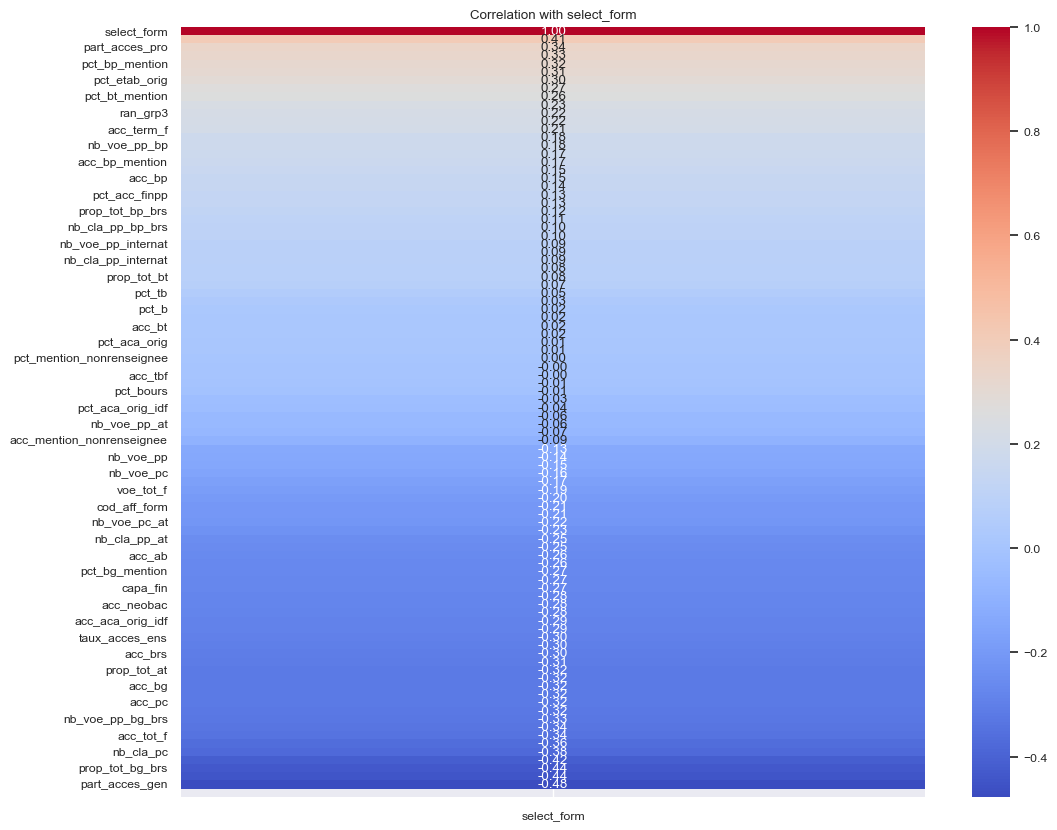

In [55]:
import seaborn as sns
correlation = X_df[num_cols].corr()
correlation.columns
#plot the coorelation with select_form
correlation_select_form = correlation['select_form'].sort_values(ascending=False)
pd.set_option('display.max_rows', None)
sns.set(font_scale=0.8)  # Adjust the font size of the annotations

plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap

sns.heatmap(correlation_select_form.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with select_form')
plt.show()


In [62]:
correlation_select_form = correlation['select_form'].sort_values(ascending=False)
correlation_select_form

select_form                  1.000000
part_acces_tec               0.407018
part_acces_pro               0.339504
pct_bp                       0.329563
pct_bp_mention               0.318400
pct_bt                       0.312258
pct_etab_orig                0.295045
acc_term                     0.269756
pct_bt_mention               0.258102
ran_grp2                     0.231645
ran_grp3                     0.218833
pct_neobac                   0.215374
acc_term_f                   0.206966
prop_tot_bp                  0.179601
nb_voe_pp_bp                 0.176237
pct_acc_debutpp              0.172179
acc_bp_mention               0.165603
nb_voe_pp_bp_brs             0.153002
acc_bp                       0.145798
pct_acc_datebac              0.144075
pct_acc_finpp                0.134027
nb_cla_pp_bp                 0.133615
prop_tot_bp_brs              0.119935
nb_cla_pp_pasinternat        0.109261
nb_cla_pp_bp_brs             0.104256
nb_voe_pp_bt                 0.100787
nb_voe_pp_in

In [68]:
correlation_select_form['part_acces_gen']

-0.4769094632934881

In [70]:
df.select_dtypes(include=['object']).nunique()

contrat_etab                         4
cod_uai                           3025
g_ea_lib_vx                       2769
dep                                104
dep_lib                            104
region_etab_aff                     21
acad_mies                           32
ville_etab                        1048
lib_for_voe_ins                   2119
fili                                11
lib_comp_voe_ins                  6873
form_lib_voe_acc                    47
fil_lib_voe_acc                    409
detail_forma                      1695
g_olocalisation_des_formations    4000
lib_grp1                             6
lib_grp2                             6
lib_grp3                             4
list_com                             2
tri                                  3
detail_forma2                       87
lien_form_psup                    7721
etablissement_id_paysage           414
composante_id_paysage               69
dtype: int64

In [157]:
list_columns_to_be_removed =["g_olocalisation_des_formations","lib_for_voe_ins","lien_form_psup","etablissement_id_paysage","composante_id_paysage",'nb_voe_pp_internat', 'nb_cla_pp_internat', 'nb_cla_pp_pasinternat','acc_internat', 'acc_term', 'acc_term_f', 'lib_grp1', 'ran_grp1','lib_grp2', 'ran_grp2', 'lib_grp3', 'ran_grp3', 'detail_forma2',"lib_for_voe_ins","g_ea_lib_vx","cod_uai"]

In [145]:

        #drop rows with NaN in the 'taux_acces_ens' column
    df = df.dropna(subset=['taux_acces_ens'])
    conditions = [ 
            (df['select_form'] == 0),
            (df['taux_acces_ens'] <= 30) & (df['select_form'] ==1),
            (df['taux_acces_ens'] > 30)  & (df['select_form'] ==1),
        ]

    choices = ['non selective', 'tres selective', 'peu selective']
    df['selectivity'] = np.select(conditions, choices, default='Unknown')

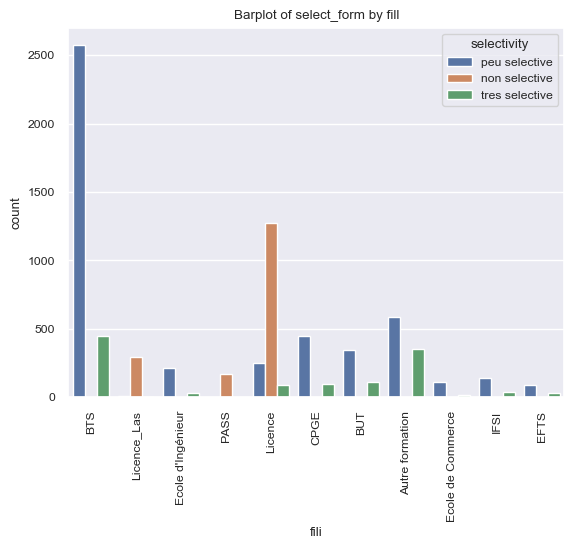

<Figure size 2000x5000 with 0 Axes>

In [146]:
sns.countplot(data=df, x="fili", hue='selectivity')
plt.title('Barplot of select_form by fill')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.figure(figsize=(20, 50))  # Increase the figsize
plt.show()

<Axes: xlabel='select_form', ylabel='count'>

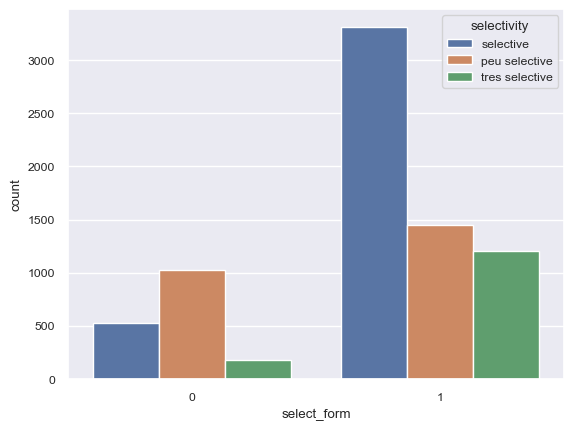

In [142]:
sns.countplot(data=df, x="select_form", hue='selectivity')

In [89]:
def categorize_by_access_rate(row, low_threshold, high_threshold):
    if row['taux_acces_ens'] > high_threshold:
        return 'non selective'
    elif low_threshold < row['taux_acces_ens'] <= high_threshold:
        return 'peu selective'
    else:
        return 'très selective'
low_threshold = 33
high_threshold = 66
df['selectivity_category'] = df.apply(lambda row: categorize_by_access_rate(row, low_threshold, high_threshold), axis=1)

/var/folders/cj/9t_94sk95dl2n0zqlvn_4ws40000gn/T/ipykernel_31086/3250387913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selectivity_category'] = df.apply(lambda row: categorize_by_access_rate(row, low_threshold, high_threshold), axis=1)


In [92]:
df['selectivity_category'].value_counts(normalize=True)

selectivity_category
non selective     0.445440
peu selective     0.343206
très selective    0.211354
Name: proportion, dtype: float64

In [149]:
num_cols = df._get_numeric_data().columns

In [150]:
df_final=df[num_cols]

In [151]:
df_final.columns.tolist()

['session',
 'select_form',
 'capa_fin',
 'voe_tot',
 'voe_tot_f',
 'nb_voe_pp',
 'nb_voe_pp_internat',
 'nb_voe_pp_bg',
 'nb_voe_pp_bg_brs',
 'nb_voe_pp_bt',
 'nb_voe_pp_bt_brs',
 'nb_voe_pp_bp',
 'nb_voe_pp_bp_brs',
 'nb_voe_pp_at',
 'nb_voe_pc',
 'nb_voe_pc_bg',
 'nb_voe_pc_bt',
 'nb_voe_pc_bp',
 'nb_voe_pc_at',
 'nb_cla_pp',
 'nb_cla_pc',
 'nb_cla_pp_internat',
 'nb_cla_pp_pasinternat',
 'nb_cla_pp_bg',
 'nb_cla_pp_bg_brs',
 'nb_cla_pp_bt',
 'nb_cla_pp_bt_brs',
 'nb_cla_pp_bp',
 'nb_cla_pp_bp_brs',
 'nb_cla_pp_at',
 'prop_tot',
 'acc_tot',
 'acc_tot_f',
 'acc_pp',
 'acc_pc',
 'acc_debutpp',
 'acc_datebac',
 'acc_finpp',
 'acc_internat',
 'acc_brs',
 'acc_neobac',
 'acc_bg',
 'acc_bt',
 'acc_bp',
 'acc_at',
 'acc_mention_nonrenseignee',
 'acc_sansmention',
 'acc_ab',
 'acc_b',
 'acc_tb',
 'acc_tbf',
 'acc_bg_mention',
 'acc_bt_mention',
 'acc_bp_mention',
 'acc_term',
 'acc_term_f',
 'acc_aca_orig',
 'acc_aca_orig_idf',
 'pct_acc_debutpp',
 'pct_acc_datebac',
 'pct_acc_finpp',
 'pct

In [152]:
y=df["selectivity"]

In [153]:
df_final = df_final.drop(columns=["select_form","taux_acces_ens"],axis=1)

In [154]:
#train a model to predict select_form
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7746753246753246

In [155]:
balanced_accuracy_score(y_test, y_pred)

0.5854285490723529

In [24]:
X_df.shape

(13869, 93)

In [25]:
X_df.iloc[0:4,85:].columns  

Index(['ran_grp1', 'ran_grp2', 'ran_grp3', 'cod_aff_form', 'taux_acces_ens',
       'part_acces_gen', 'part_acces_tec', 'part_acces_pro'],
      dtype='object')

In [26]:

#feature importance

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking

print("Feature ranking:")
for f in range(X_df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 89 (0.084194)
2. feature 72 (0.081094)
3. feature 79 (0.071509)
4. feature 90 (0.071362)
5. feature 91 (0.070566)
6. feature 19 (0.062539)
7. feature 53 (0.053847)
8. feature 54 (0.047629)
9. feature 86 (0.028972)
10. feature 84 (0.028073)
11. feature 85 (0.027114)
12. feature 26 (0.025324)
13. feature 23 (0.023135)
14. feature 33 (0.021361)
15. feature 45 (0.020968)
16. feature 27 (0.020162)
17. feature 78 (0.019792)
18. feature 1 (0.019404)
19. feature 63 (0.018980)
20. feature 74 (0.018816)
21. feature 7 (0.018149)
22. feature 28 (0.014722)
23. feature 77 (0.014233)
24. feature 73 (0.012166)
25. feature 24 (0.011579)
26. feature 25 (0.011109)
27. feature 92 (0.010492)
28. feature 81 (0.007871)
29. feature 83 (0.007446)
30. feature 82 (0.007173)
31. feature 22 (0.007127)
32. feature 67 (0.006809)
33. feature 75 (0.005740)
34. feature 8 (0.005487)
35. feature 29 (0.005188)
36. feature 13 (0.004724)
37. feature 10 (0.004398)
38. feature 76 (0.003931)
39. fea